In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix
import time
from matplotlib.animation import FuncAnimation

In [3]:
try_number = 0
path = 'Forward/'

In [4]:
####!!!
####Очень важно сохранять отношение t к h как 1 к 100
####Т.е. размер в 10000 больше чем конечнее время
####!!!

###Так как метод Абсоютно устойчив только в малекнькой окружности

T = 0.01
field_size = 50
time_duration = 100
t = T / time_duration
h = 1 / (field_size - 1)

u = np.zeros((field_size, field_size, time_duration))

In [5]:
def phi(x, y):
    return np.sin(np.pi * x) * np.sin(np.pi * y)

def g(x, y, t):
    return 0

In [6]:
def Solution():
    for k in range(0, int(T / t)):
        for i in range(field_size):
            for j in range(field_size):
                if k == 0:
                    u[i][j][k] = phi(i * h, j * h)
                elif i == 0 or i == field_size - 1 or j == 0 or j == field_size - 1:
                    u[i][j][k] = g(i * h, j * h, k * t)
                else:     
                    u[i][j][k] = t * ((u[i - 1][j][k - 1] - 2 * u[i][j][k - 1] + u[i + 1][j][k - 1]) / h ** 2 + \
                                + (u[i][j - 1][k - 1] - 2 * u[i][j][k - 1] + u[i][j + 1][k - 1]) / h ** 2) + u[i][j][k - 1]

In [7]:
Solution()

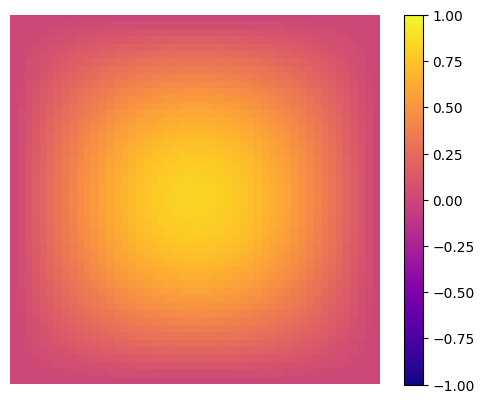

In [8]:
fig, ax = plt.subplots()
frames = time_duration - 3
interval = 100
heatmap = ax.imshow(u[:, :, 0], cmap='plasma', interpolation='nearest', vmin = -1, vmax = 1)

def update(frame):
    heatmap.set_array(u[:, :, frame - 1])
    return [heatmap]

plt.colorbar(heatmap)
plt.axis('off')
ani = FuncAnimation(fig, update, frames=frames, interval=interval, blit=True)
ani.save(path + f'Method animation{try_number}.gif', writer=PillowWriter(fps=10))

In [9]:
u_solve = np.zeros_like(u)
R = np.zeros_like(u)

def solve(x, y, t):
    return np.exp(-2 * np.pi ** 2 * t) * np.sin(np.pi * x) * np.sin(np.pi * y)

In [10]:
def create_u_solve_and_R():
    global max_R
    global time_R
    for k in range(time_duration):
        for i in range(field_size):
            for j in range(field_size):
                u_solve[i, j, k] = solve(i * h, j * h, k * t)
                R[i, j, k] = abs(u_solve[i, j, k] - u[i, j, k])
                if R[i, j, k] > max_R:
                    max_R = R[i, j, k]
                    time_R = k
                    

In [11]:
max_R = 0.0
time_R = 0.0
create_u_solve_and_R()

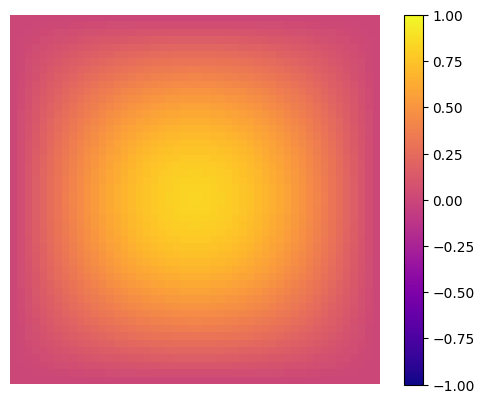

In [12]:
fig, ax = plt.subplots()
frames = time_duration - 3
interval = 100
heatmap = ax.imshow(u[:, :, 0], cmap='plasma', interpolation='nearest', vmin = -1, vmax = 1)

def update(frame):
    heatmap.set_array(u_solve[:, :, frame - 1])
    return [heatmap]

plt.colorbar(heatmap)
plt.axis('off')
ani = FuncAnimation(fig, update, frames=frames, interval=interval, blit=True)
ani.save(path + f'solve animation{try_number}.gif', writer=PillowWriter(fps=10))

In [13]:
print(f'Максимальная погрешность равна {max_R} на итерации {time_R}')

Максимальная погрешность равна 0.00010357024415164062 на итерации 99


MovieWriter imagemagick unavailable; using Pillow instead.


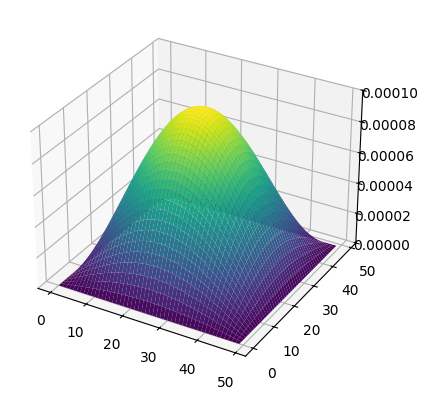

In [15]:
x = np.arange(field_size)
y = np.arange(field_size)
x, y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(0, 0.0001)

# Начальное значение поверхности
z = R[:, :, 0]
surf = ax.plot_surface(x, y, z, cmap='viridis')

def update(frame):
    ax.clear()
    ax.set_zlim(0, 0.0001)
    z = R[:, :, frame]
    surf = ax.plot_surface(x, y, z, cmap='viridis')
    return surf,

ani = FuncAnimation(fig, update, frames=frames, blit=False)
ani.save(path + f'Error animation{try_number}.gif', writer='imagemagick', fps=15)
plt.show()
